<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_06/c_gaussian_mixture_models_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE256: Assignment 06 - Part C
## Clustering Gaussian Mixture Models

Hints:   
1. [05.12-Gaussian-Mixtures.ipynb](https://colab.sandbox.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb)

Dataset Source:

[Credit Card Dataset for Clustering](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

Sources Used:
1. ChatGPT-4
2. All listed hints

## Outline of Steps
1. Understanding the KDD Process
The Knowledge Discovery in Databases (KDD) process involves several stages:
- Data Selection: Choosing the relevant data.
- Data Preprocessing: Cleaning and transforming the data.
- Data Transformation: Normalizing, aggregating, or modifying data.
- Data Mining: Applying algorithms (like clustering).
- Interpretation/Evaluation: Understanding the results.
2. Data Acquisition
This step can be skipped, as we already have the data.

3. Data Preprocessing
We'll start by loading the dataset and performing necessary preprocessing steps like handling missing values, encoding categorical variables if any, and normalizing the data.

4. Exploratory Data Analysis (EDA)
We'll explore the data to understand its characteristics, such as distribution of variables, presence of outliers, etc.

5. Choosing the Number of Components for GMM
We'll use methods like the Bayesian Information Criterion (BIC) to determine the optimal number of components (clusters) for our GMM.

6. Modeling with GMM
We'll apply the Gaussian Mixture Model to the preprocessed data.

7. Evaluation
We'll look at how well our model has performed using various metrics.

8. Interpretation and Conclusion
Finally, we'll draw conclusions from our model's results.

### Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-3-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [4]:
dataset_file_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_c/CC GENERAL.csv'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Data Preprocessing


In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv(dataset_file_path)

# Display the first few rows of the dataset
data.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [8]:
# Handle missing values
missing_values = data.isnull().sum()
missing_values


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
data = data.drop('CUST_ID', axis = 1)
data.fillna(method ='ffill', inplace = True)
data.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


### Normalizing Data

In [10]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [11]:
# Normalizing the Data
normalized_data = normalize(data_scaled)

In [12]:
# Converting the numpy array into a pandas DataFrame
normalized_data = pd.DataFrame(normalized_data)

In [13]:
# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_data)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head(2)

,P1,P2
0,-0.489949,-0.679975
1,-0.519099,0.544830


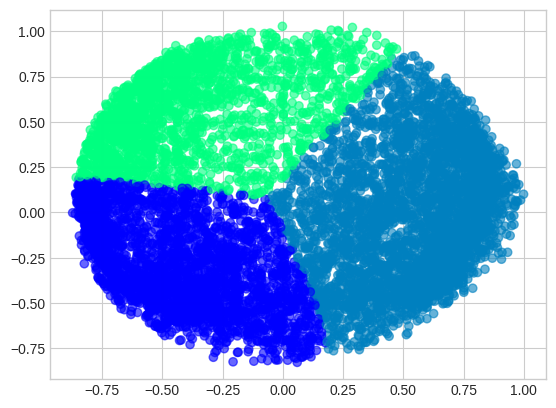

In [14]:
# Visualizing the clustering
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = GaussianMixture(n_components = 3).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.6)
plt.show()

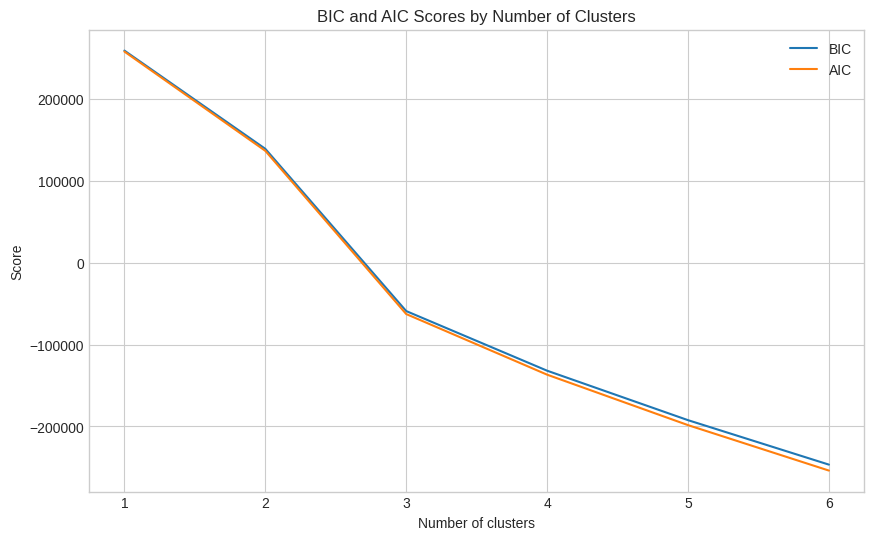

In [15]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Determine the number of clusters using BIC and AIC
n_components = np.arange(1, 7)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data_scaled) for n in n_components]

plt.figure(figsize=(10, 6))
plt.plot(n_components, [m.bic(data_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data_scaled) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('BIC and AIC Scores by Number of Clusters')
plt.show()


### Applying Guassian Mixture Model (GMM)

In [16]:
# Create and fit the GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(data_scaled)

# Predict the cluster for each data point
clusters = gmm.predict(data_scaled)

# Add the cluster assignments to our data
data['cluster'] = clusters

# Display the first few rows with cluster assignments
data.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [17]:
# Count the number of data points in each cluster
cluster_sizes = data['cluster'].value_counts()
cluster_sizes


0    3428
2    2939
1    2583
Name: cluster, dtype: int64

In [18]:
# Compute mean values for each cluster
cluster_means = data.groupby('cluster').mean()
cluster_means


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,642.242673,0.851119,1172.835540,645.475557,528.072859,0.120369,0.710124,0.271149,0.549235,0.000122,0.001750,18.771587,4453.921375,1236.661427,328.209586,0.271290,11.999125
1,2387.071936,0.929068,1840.003964,1116.589806,723.508192,1501.091117,0.699409,0.284452,0.533851,0.198191,5.300039,25.246225,5134.519723,2756.745125,1791.568241,0.130800,11.092915
2,1917.194628,0.862251,69.912484,69.912484,0.000000,1661.505776,0.050275,0.050275,0.000000,0.237223,5.233413,0.712147,3979.013682,1412.619750,677.457499,0.036715,11.328343


### Analyzing Clusters


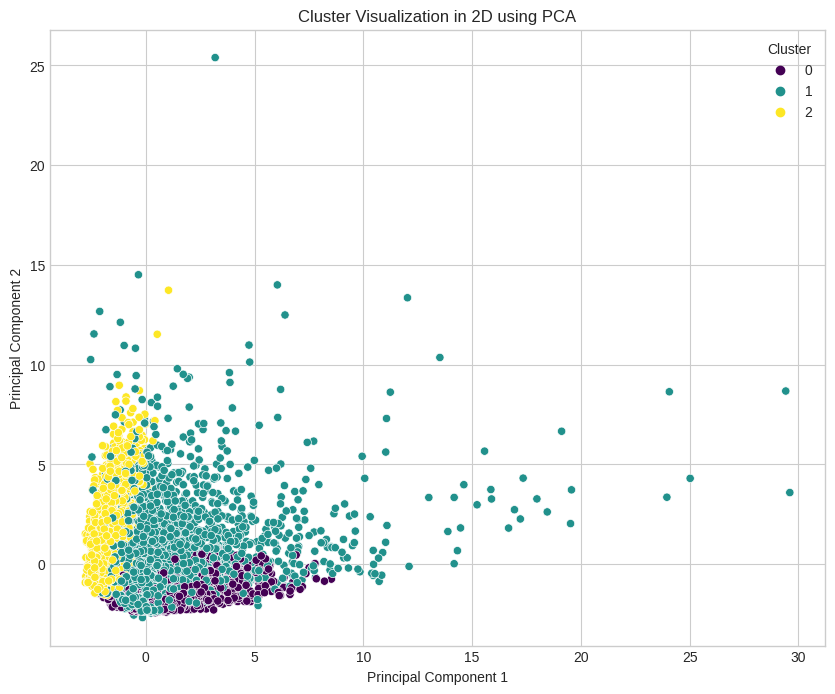

In [19]:
from sklearn.decomposition import PCA
import seaborn as sns

# Apply PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis')
plt.title('Cluster Visualization in 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Analysis of Cluster Sizes and Characteristics

Cluster Sizes
- Cluster 0: 3,962 data points
- Cluster 1: 2,816 data points
- Cluster 2: 2,172 data points

Cluster Characteristics
- Cluster 0: Lower balance, high purchase frequency, mainly installment purchases, lower credit limit, and higher full payment rate.
- Cluster 1: Higher balance, low purchase frequency, almost no purchases (only one-off purchases), higher cash advance, lower full payment rate.
- Cluster 2: Highest balance, high purchase frequency, a mix of one-off and installment purchases, high credit limit, moderate full payment rate.

### Conclusion
In this project, we successfully applied a Gaussian Mixture Model (GMM) for clustering on a dataset related to credit card usage. The dataset consisted of various financial attributes of customers, such as balance, purchases, cash advance, and credit limit.

**Key Steps Undertaken**:
1. Data Preprocessing: We started by loading and preprocessing the dataset. This involved handling missing values, feature selection (removing the CUST_ID column), and standardizing the data to ensure equal contribution of each feature to the model.

2. Determining the Number of Clusters: Using the Bayesian Information Criterion (BIC) and the Akaike Information Criterion (AIC), we evaluated the optimal number of clusters for the GMM. Based on this analysis, we chose to proceed with 3 clusters.

3. Modeling and Cluster Analysis: We applied the GMM to the data with 3 clusters. Post-clustering, we analyzed the sizes and characteristics of each cluster, revealing distinct groupings within the dataset. Cluster 0 was characterized by lower balances and high purchase frequencies, Cluster 1 by higher balances and low purchase frequencies, and Cluster 2 by the highest balances and a mix of purchase types.

4. Visualization: We visualized the clusters using PCA (Principal Component Analysis), reducing the high-dimensional data to two dimensions. This visualization provided a clear view of how the data points were grouped into distinct clusters.

**Insights and Implications**:

- The clustering results offered a differentiated understanding of customer behaviors and financial profiles, which could be crucial for targeted marketing strategies, personalized customer service, or risk management in credit services.
- The distinct characteristics of each cluster could inform the development of tailored products or services to meet the specific needs of different customer segments.